In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from scipy import stats
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import polyfit
import random

In [2]:
data_reds =pd.read_csv("./Resources/reds.csv")
data_whites =pd.read_csv("./Resources/white.csv")
#testing_data = pd.read_csv('df.csv')
#single_test = pd.read_csv('2_features.csv', header = None)
#single_test
#del single_test['Unnamed: 0']



In [3]:
# result = pd.concat([df1, df4], ignore_index=True, sort=False)
df = pd.concat([data_reds, data_whites], ignore_index=True, sort = False)

In [4]:
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
Unnamed: 0              6497 non-null int64
fixed.acidity           6497 non-null float64
volatile.acidity        6497 non-null float64
citric.acid             6497 non-null float64
residual.sugar          6497 non-null float64
chlorides               6497 non-null float64
free.sulfur.dioxide     6497 non-null float64
total.sulfur.dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


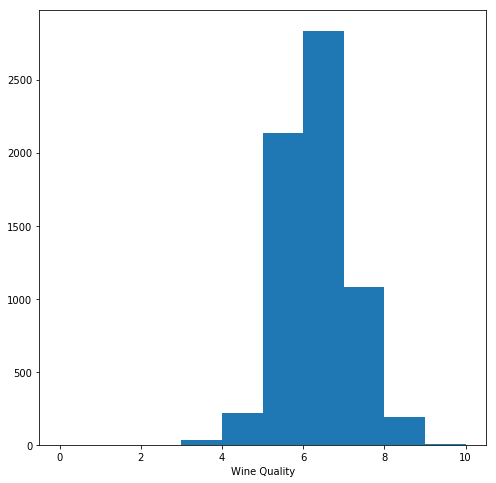

In [6]:
plt.figure(figsize=(8, 8))
plt.hist(df['quality'], range=(0, 10))
plt.xlabel('Wine Quality')
plt.show()

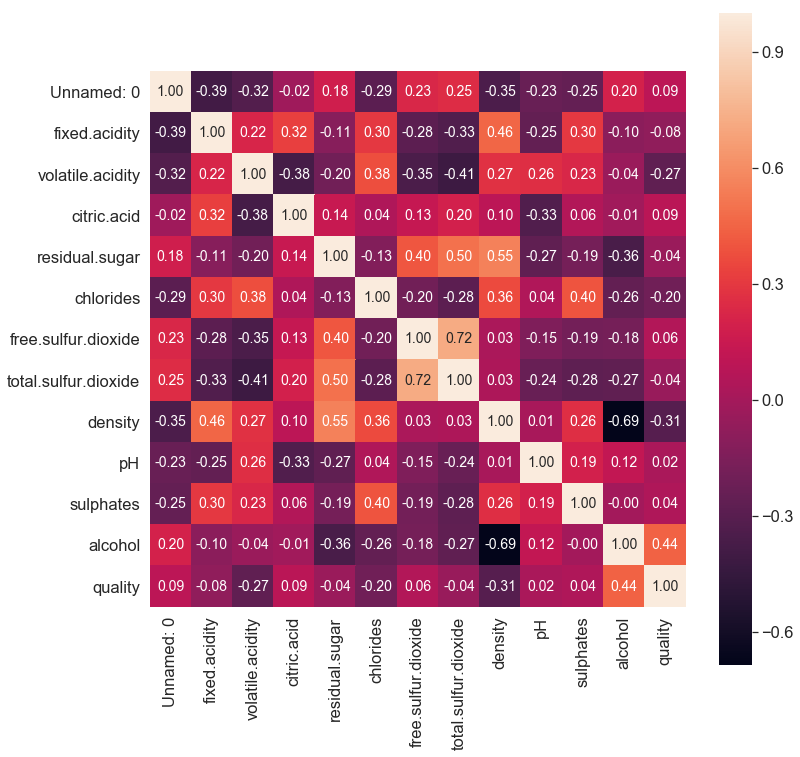

In [7]:
def heatmap(df):
    plt.figure(figsize=(12, 12))
    sns.set(font_scale=1.5)
    sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 14}, yticklabels=df.columns, 
                xticklabels=df.columns)
    plt.show()
    
heatmap(df)

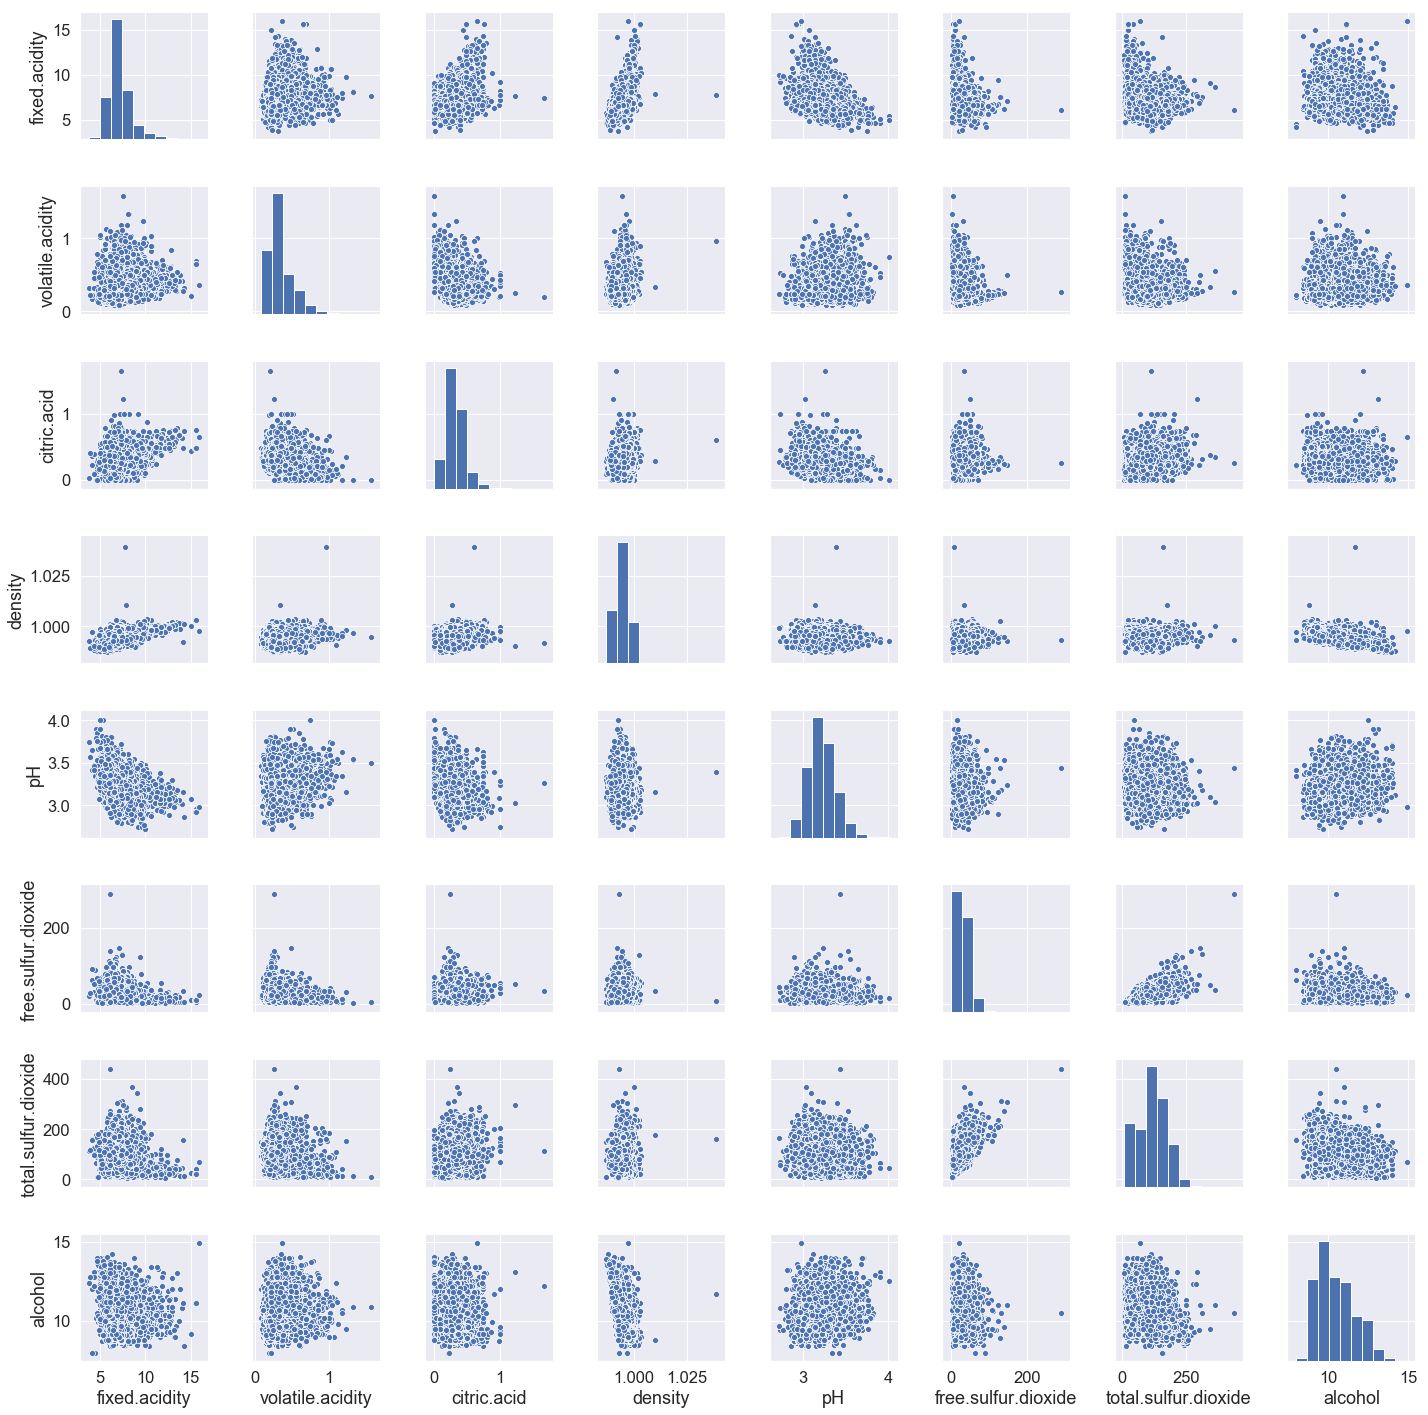

In [8]:
corr_cols = ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'density', 'pH', 'free.sulfur.dioxide', 
             'total.sulfur.dioxide', 'alcohol']

def pairplot(cols):
    sns.pairplot(df[cols])
    plt.show()
    
pairplot(corr_cols)

In [9]:
def corr_plot(x_axis, x_label, y_axis, y_label, title=None, legend=None):
    plt.figure(figsize=(8, 8))
    plt.scatter(x_axis, y_axis)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [10]:
def plot_relationship_best_fit(x_axis, x_label, y_axis, y_label, best_fit='linear'):
    fit = None
    
    if best_fit == 'linear':
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_axis)
        fit = slope * x_axis + intercept
#         c = polyfit(x_axis, y_axis, 1)
#         fit = c[0] + c[1]*x_axis
    
    if best_fit == 'quadratic':
        popt, pcov = curve_fit(func, x_axis, y_axis)
        fit = func(x_axis, *popt)
        
#         coef = polyfit(x_axis, y_axis, 2)
#         fit = coef[0] + coef[1]*x_axis + coef[2]*(x_axis**2)
        
    np.random.seed(42)
    r = random.randint(0, len(x_axis)-1)
    
    plt.figure(figsize=(8,8))    
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, fit, color='r')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def func(x, a, b, c):
    return a*(x**2) + b*x + c

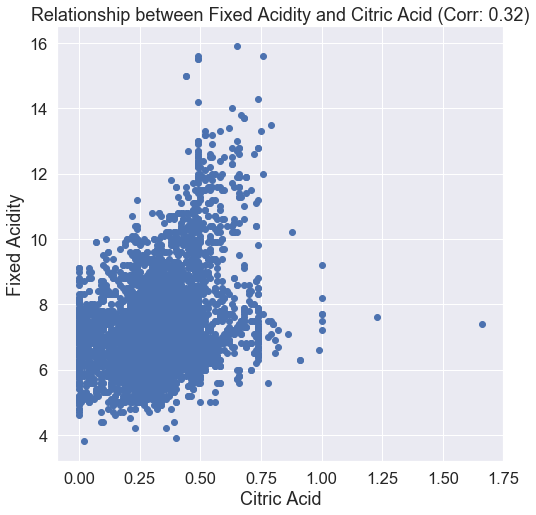

In [11]:
corr = 'Corr: %.2f' % df['fixed.acidity'].corr(df['citric.acid'])
corr_plot(df['citric.acid'], 'Citric Acid', df['fixed.acidity'], 'Fixed Acidity', 
          'Relationship between Fixed Acidity and Citric Acid ({})'.format(corr))

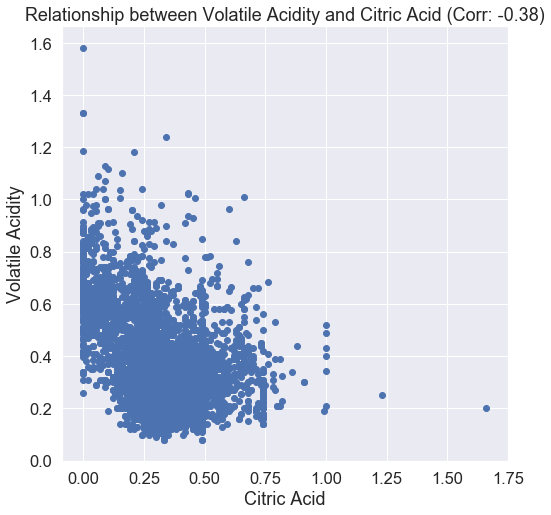

In [12]:
corr = 'Corr: %.2f' % df['volatile.acidity'].corr(df['citric.acid'])
corr_plot(df['citric.acid'], 'Citric Acid', df['volatile.acidity'], 'Volatile Acidity', 
          'Relationship between Volatile Acidity and Citric Acid ({})'.format(corr)) 

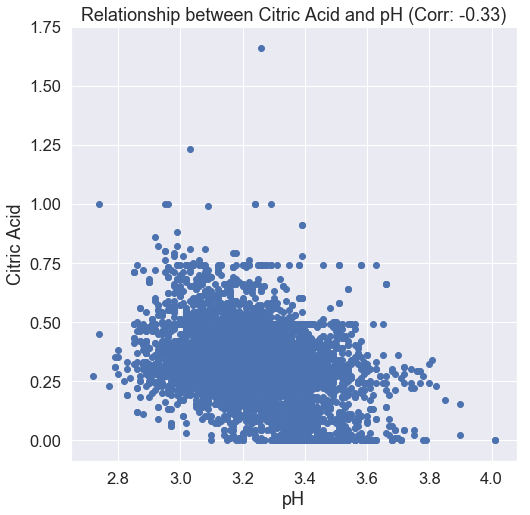

In [13]:
corr = 'Corr: %.2f' % df['citric.acid'].corr(df['pH'])
corr_plot(df['pH'], 'pH', df['citric.acid'], 'Citric Acid', 
          'Relationship between Citric Acid and pH ({})'.format(corr))

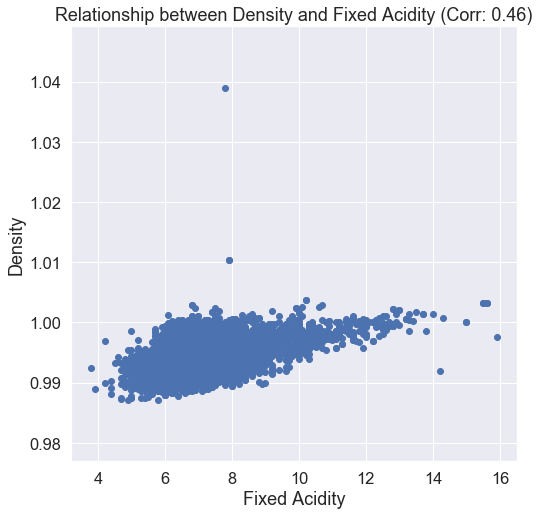

In [14]:
corr = 'Corr: %.2f' % df['density'].corr(df['fixed.acidity'])
corr_plot(df['fixed.acidity'], 'Fixed Acidity', df['density'], 'Density', 
          'Relationship between Density and Fixed Acidity ({})'.format(corr))

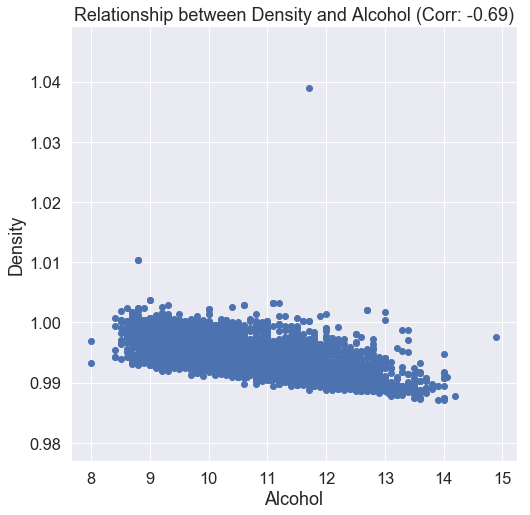

In [15]:
corr = 'Corr: %.2f' % df['density'].corr(df['alcohol'])
corr_plot(df['alcohol'], 'Alcohol', df['density'], 'Density', 
          'Relationship between Density and Alcohol ({})'.format(corr))

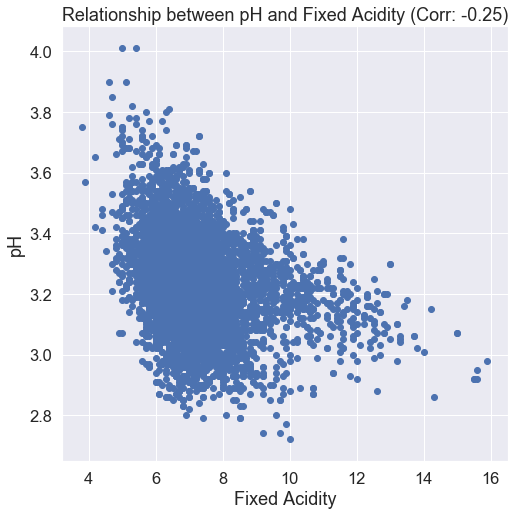

In [16]:
corr = 'Corr: %.2f' % df['pH'].corr(df['fixed.acidity'])
corr_plot(df['fixed.acidity'], 'Fixed Acidity', df['pH'], 'pH', 
          'Relationship between pH and Fixed Acidity ({})'.format(corr))

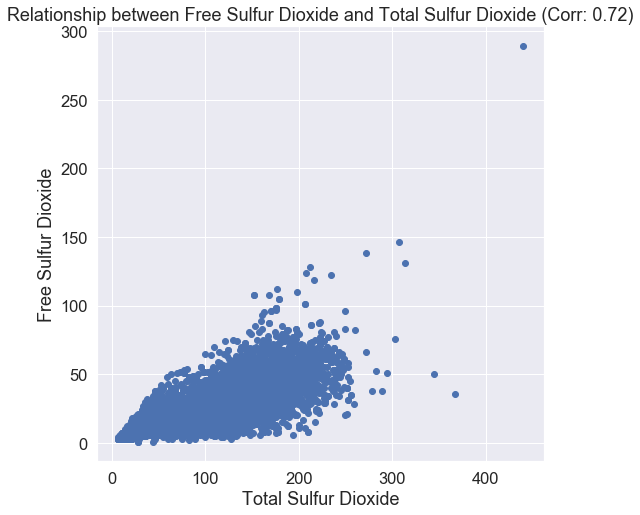

In [17]:
corr = 'Corr: %.2f' % df['free.sulfur.dioxide'].corr(df['total.sulfur.dioxide'])
corr_plot(df['total.sulfur.dioxide'], 'Total Sulfur Dioxide', df['free.sulfur.dioxide'], 'Free Sulfur Dioxide', 
          'Relationship between Free Sulfur Dioxide and Total Sulfur Dioxide ({})'.format(corr))

In [18]:
df['total acidity'] = df['fixed.acidity'] + df['volatile.acidity']
df['fixed acidity citric acid'] = df['fixed.acidity'] * df['citric.acid']
df['fixed acidity density'] = df['fixed.acidity'] * df['density']
df['fixed acidity pH'] = df['fixed.acidity'] * df['pH']
df['volatile acidity citric acid'] = df['volatile.acidity'] * df['citric.acid']
df['citric acid pH'] = df['citric.acid'] * df['pH']
df['sulfur dioxide content'] = df['total.sulfur.dioxide'] * df['free.sulfur.dioxide']
df['alcohol density'] = df['alcohol'] * df['density']
df['alcohol quality'] = df['alcohol'] * df['quality']


df.drop(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'density', 'pH', 'total.sulfur.dioxide', 
         'free.sulfur.dioxide', 'alcohol'], axis=1, inplace=True)
df = df.reset_index(drop=True)
df.head()

,Unnamed: 0,residual.sugar,chlorides,sulphates,quality,total acidity,fixed acidity citric acid,fixed acidity density,fixed acidity pH,volatile acidity citric acid,citric acid pH,sulfur dioxide content,alcohol density,alcohol quality
0,1,1.9,0.076,0.56,5,8.10,0.000,7.38372,25.974,0.0000,0.0000,374.0,9.37932,47.0
1,2,2.6,0.098,0.68,5,8.68,0.000,7.77504,24.960,0.0000,0.0000,1675.0,9.76864,49.0
2,3,2.3,0.092,0.65,5,8.56,0.312,7.77660,25.428,0.0304,0.1304,810.0,9.77060,49.0
3,4,1.9,0.075,0.58,6,11.48,6.272,11.17760,35.392,0.1568,1.7696,1020.0,9.78040,58.8
4,5,1.9,0.076,0.56,5,8.10,0.000,7.38372,25.974,0.0000,0.0000,374.0,9.37932,47.0


In [19]:
random_state = 42
target = df['quality']
features = df.drop('quality', axis=1)
features.shape
#features.to_csv('features.csv')

(6497, 13)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=random_state)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4872, 13)
(1625, 13)
(4872,)
(1625,)


In [21]:
#X_test.to_csv('combined_test_data.csv')
#single_test.values.flatten()

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#single_test = scaler.transform(single_test) 

C:\Users\leety\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\leety\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\leety\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNet

cv = KFold(n_splits=10, shuffle=True, random_state=random_state)

def experimentation_scores(scores):
    return scores.mean()

In [24]:
model = DecisionTreeRegressor(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
dtr_score = experimentation_scores(scores)

In [25]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
lr_score = experimentation_scores(scores)

In [26]:
model = Ridge(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
ri_score = experimentation_scores(scores)

In [27]:
model = Lasso(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
la_score = experimentation_scores(scores)

In [28]:
model = ElasticNet(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
el_score = experimentation_scores(scores)

In [29]:
model = RandomForestRegressor(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
rfr_score = experimentation_scores(scores)

C:\Users\leety\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\leety\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\leety\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\leety\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\leety\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [30]:
model = SVR()
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
svr_score = experimentation_scores(scores)

C:\Users\leety\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leety\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leety\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\leety\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

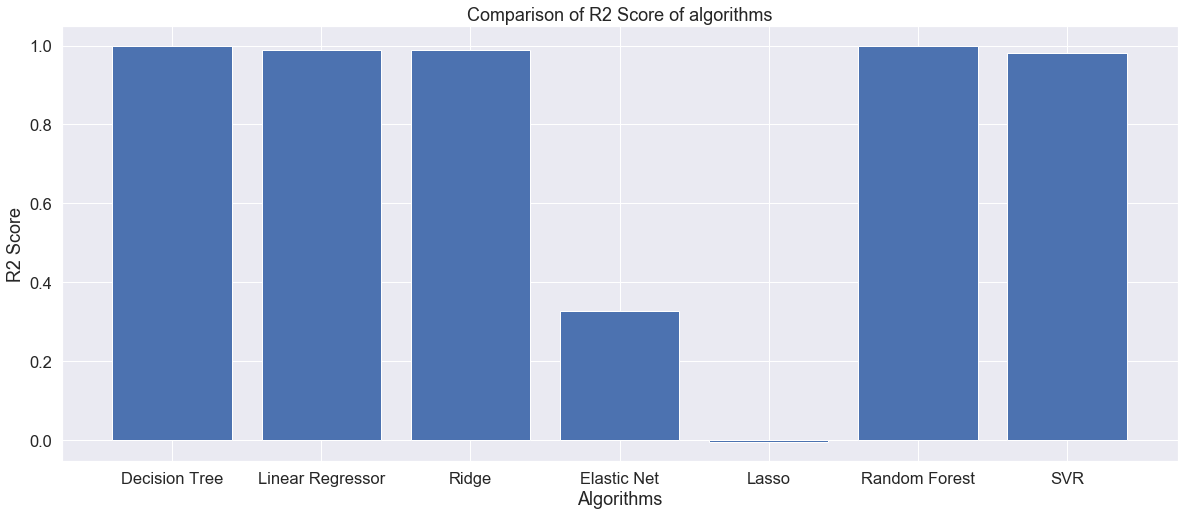

In [31]:
x = np.arange(7)
plt.figure(figsize=(20, 8))
plt.bar(x, [dtr_score, lr_score, ri_score, el_score, la_score,rfr_score,svr_score])
plt.xticks(x, ('Decision Tree', 'Linear Regressor', 'Ridge', 'Elastic Net', 'Lasso','Random Forest', 
               'SVR'))
plt.title('Comparison of R2 Score of algorithms')
plt.xlabel('Algorithms')
plt.ylabel('R2 Score')
plt.show()

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
predictions

array([8.23658542, 4.99581768, 7.04247455, ..., 6.843326  , 4.27080546,
       5.951785  ])

In [34]:
score = model.score(X_test, y_test)
print('Score: %.3f' % score) 
predictions

Score: 0.988


array([8.23658542, 4.99581768, 7.04247455, ..., 6.843326  , 4.27080546,
       5.951785  ])

array([8.23658542, 4.99581768, 7.04247455, ..., 6.843326  , 4.27080546,
       5.951785  ])

In [36]:
filename = 'finalized_model.sav'

In [37]:
import pickle
pickle.dump(model, open(filename, 'wb'))

In [38]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9880744698299925
